<h3> Linear Regression

<b>Objective:</b><br>
    1. The basic concepts and mathematics behind the model
    2. How to implement linear regression from scratch using simulated data
    3. How to implement linear regression using scikit-learn

There are two types of supervised machine learning algorithms: `Regression` and `classification`. The former predicts `continuous` value outputs while the latter predicts `discrete` outputs.<br> For instance, predicting the price of a house in dollars is a `regression` problem whereas predicting whether a tumor is malignant or benign is a `classification` problem.

The term `linearity` in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two-dimensional space (between two variables), we get a straight line.

Linear regression performs the task to predict a dependent variable value *(y)* based on a given independent variable *(x)*. So, this regression technique finds out a linear relationship between *x(input)* and *y(output)*. Hence, the name is Linear Regression.

If we plot the independent variable *(x)* on the x-axis and dependent variable *(y)* on the y-axis, linear regression gives us a straight line that best fits the data points, as shown in the figure below.

<img src="../Images/Regression-1.png" alt="Alt text that describes the graphic" title="Title text" />

The equation of the above line is : _*Yₑ = α + β X*_

Where <font color=blue>*α</font> is the intercept and <font color=blue>*β</font>  is the slope of the line. So basically, the linear regression algorithm gives us the most optimal value for the intercept and the slope (in two dimensions). The `Y` and `X` variables remain the same, since they are the data features and cannot be changed. The values that we can control are the intercept(<font color=blue>α</font>) and slope(<font color=blue>β</font>). There can be multiple straight lines depending upon the values of intercept and slope. Basically what the linear regression algorithm does is it fits multiple lines on the data points and returns the line that results in the least error.

Our goal is to find statistically significant values of the parameters <font color=blue>*α</font> and <font color=blue>*β</font> that minimise the difference between <font color=blue>*Y</font> and <font color=blue>*Yₑ</font>.

If we are able to determine the optimum values of these two parameters(α and β), then we will have the line of best fit that we can use to predict the values of `Y`, given the value of `X`.

So, how do we estimate α and β? We can use a method called ordinary least squares.

## Ordinary Least Squares

<img src="../Images/OLS.png" alt="Alt text that describes the graphic" title="Title text" />

The objective of the least squares method is to find values of `α` and `β`that minimise the sum of the squared difference between `Y` and `Yₑ`. 

<img src="../Images/eqs.gif" alt="Alt text that describes the graphic" title="Title text" /> 

where X̄ is the mean of X values and Ȳ is the mean of Y values.

If you are familiar with statistics, you may recognise β as simply
Cov(X, Y) / Var(X).

## Linear Regression From Scratch

To get started, let’s simulate some data and look at how the predicted values (`Yₑ`) differ from the actual value (`Y`):

In [12]:
import pandas as pd
import numpy as np

# Generate 'random' data
np.random.seed(0)
X = 2.5 * np.random.randn(100) + 1.5   # Array of 100 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 100 residual terms
y = 2 + 0.3 * X + res                  # Actual values of Y

# Create pandas dataframe to store our X and y values
df = pd.DataFrame(
    {'X': X,
     'y': y}
)

# Show the first five rows of our dataframe
df.head()

,X,y
0,5.910131,4.714615
1,2.500393,2.076238
2,3.946845,2.548811
3,7.102233,4.615368
4,6.168895,3.264107


In [14]:
import pandas as pd
import numpy as np
df = pd.read_csv("/home/rohan/Documents/demo.csv")

In [15]:
df.shape

(9, 2)

In [16]:
df.columns

Index(['X', 'y'], dtype='object')

To estimate y using the `OLS` method, we need to calculate `xmean` and `ymean`, the *covariance of X and y (xycov)*, and the *variance of X (xvar)* before we can determine the values for  α and β.

In [18]:
# Calculate the mean of X and y
xmean = np.mean(df['X'])
ymean = np.mean(df['y'])

# Calculate the terms needed for the numator and denominator of beta
df['xycov'] = (df['X'] - xmean) * (df['y'] - ymean)
df['xvar'] = (df['X'] - xmean)**2

# Calculate beta and alpha
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {np.round(alpha,2)}')
print(f'beta = {np.round(beta,2)}')

alpha = 3.02
beta = 0.5


Great, we now have an estimate for alpha and beta! Our model can be written as `Yₑ = 2.003 + 0.323X`, and we can make predictions:

In [16]:
ypred = alpha + beta*X

In [18]:
len(ypred)

100

Let’s plot our prediction `ypred` against the actual values of `y`, to get a better visual understanding of our model.

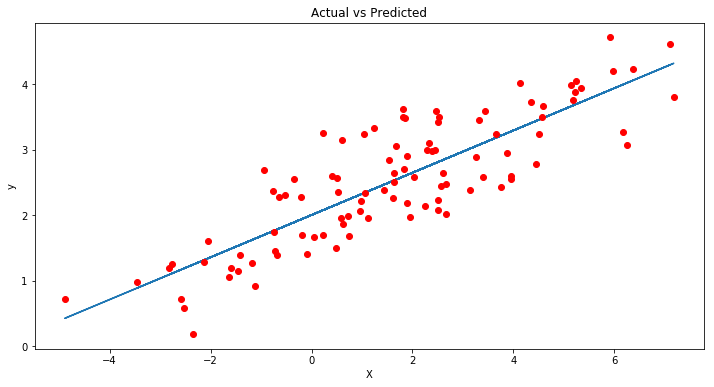

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(X, ypred)     # regression line
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

The blue line is our line of best fit, `Yₑ = 2.003 + 0.323X`. We can see from this graph that there is a positive linear relationship between `X` and `y`. Using our model, we can predict `y` from any values of `X`!

For example, if we had a value *X = 10*, we can predict that:
*Yₑ = 2.003 + 0.323 (10) = 5.233*.

## Linear Regression with scikit-learn

To demonstrate this method, we will be using a very popular advertising dataset about various costs incurred on advertising by different mediums and the sales for a particular product. You can download this dataset [here]('https://www.kaggle.com/ashydv/advertising-dataset').

We will only be looking at the TV variable in this example — we will explore whether TV advertising spending can predict the number of sales for the product. Let’s start by importing this csv file as a pandas dataframe using read_csv():

In [6]:
import pandas as pd
advert = pd.read_csv("../Data/Advertising.csv")
advert.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


This same concept can be extended to cases where there are `more than two variables`. This is called *multiple linear regression*. For instance, consider a scenario where you have to predict the price of the house based upon its area, number of bedrooms, the average income of the people in the area, the age of the house, and so on. In this case, the dependent variable(target variable) is dependent upon several independent variables.

A regression model involving multiple variables can be represented as: _`y = b0 + m1b1 + m2b2 + m3b3 + … … mnbn`_

This is the equation of a `hyperplane`. Remember, a linear regression model in *two dimensions* is a `straight line`; in *three dimensions* it is a `plane`, and in more than *three dimensions*, a `hyperplane`.

In [19]:
from sklearn.linear_model import LinearRegression

# Build linear regression model using TV and Radio as predictors
# Split data into predictors X and output Y
predictors = ['X']
X = advert[predictors]
y = advert['Sales']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

In [20]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 2.921099912405138
betas = [0.04575482 0.18799423]


Sales = 2.921 + 0.046 TV + 0.1880 Radio.

In [9]:
model.predict(X)

array([20.55546463, 12.34536229, 12.33701773, 17.61711596, 13.22390813,
       12.51208449, 11.71821241, 12.10551553,  3.7093792 , 12.55169696,
        7.0358597 , 17.25652015, 10.60866187,  8.81095051, 18.44466773,
       20.82891539, 12.90386507, 23.24107626,  9.94121476, 14.15384619,
       18.12139161, 14.74206357,  6.51417168, 16.54402663,  8.14035215,
       15.6080206 , 14.96769383, 17.0463346 , 19.39954145,  9.15929748,
       21.64292187, 11.35791808,  7.65045928, 18.83346334,  7.56302763,
       16.99280099, 23.36720719, 15.6258994 ,  9.91257829, 20.4405801 ,
       16.37872122, 17.29870935, 21.5621537 , 13.96692266,  8.9009974 ,
       15.16263814,  8.88644967, 21.69944046, 16.28690268,  8.18162949,
       12.64569407,  9.31962792, 20.66180115, 19.96126242, 20.35512357,
       21.30864743,  8.53774783, 12.76239488, 21.89072858, 18.10746914,
        5.74497097, 22.90418658, 16.78413768, 13.18474853, 16.96570907,
        7.82652846,  8.98703456, 12.02066194, 18.95313425, 21.09

Now that we’ve fit a multiple linear regression model to our data, we can predict sales from any combination of TV and Radio advertising costs! For example, if we wanted to know how many sales we would make if we invested 300 in TV advertising and 200 in Radio advertising…  all we have to do is plug in the values!

In [10]:
new_X = [[300, 200]]
print(model.predict(new_X))

[54.24638977]


In [1]:
from sklearn.linear_model import LinearRegression